<h1 align='center'> Gradient Descent </h1>

- Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems.
- The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

- Suppose you are lost in the mountains in a dense fog; 
- You can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does.
- It measures the __local gradient__ of the __error function__ with regards to the parameter vector __θ__, and it goes in the direction of __descending gradient__. Once the gradient is zero, you have reached a minimum!


- Concretely, you start by filling θ with random values (this is called __random initialization__), and then you __improve it gradually__, taking one baby step at a time, each step attempting to __decrease the cost function__ (e.g., the MSE), until the algorithm converges to a minimum

### <font color='green'>Algorithm </font>

1. Initialize random value of m, b.
2. In general we initialize it as m=1, b=0.
3. Select epochs(iteration) & learning rate
4. for i in epochs:
    - b = b - lr * slop
    - m = m - lr * slop
    
5. find slop as 
    - dL/dm = -2 sum( (Y - m*X - b) * X )
    - dL/db = -2 sum (Y - m*X - b) 

### Import libraries

In [1]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=10, random_state=65)

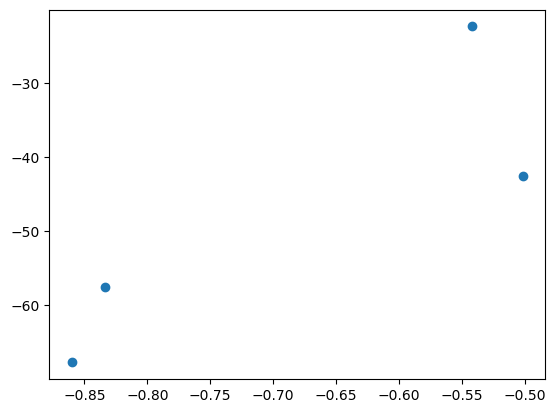

In [3]:
plt.scatter(X,y)

### OLS

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X,y)

LinearRegression()

In [7]:
lr.coef_

array([89.32896832])

In [8]:
lr.intercept_

13.637832684803598

#### Best fit line

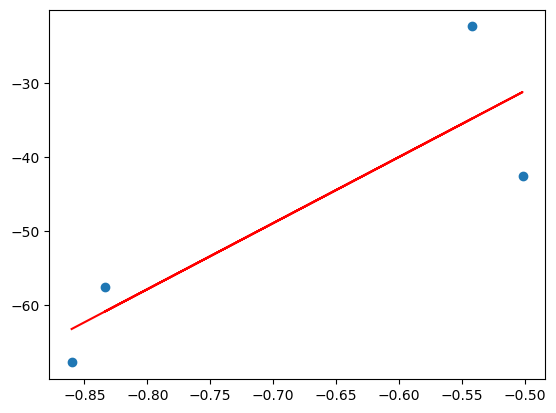

In [9]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')

### Gradient Descent

1. Lets apply GD assuming slop is constant m = 89.32896832
2. Lets assume starting value of b = 0

#### Set random value of m,b

### Iteration 1

In [10]:
y_pred = ((89.32896832 * X)+ 0).reshape(4)

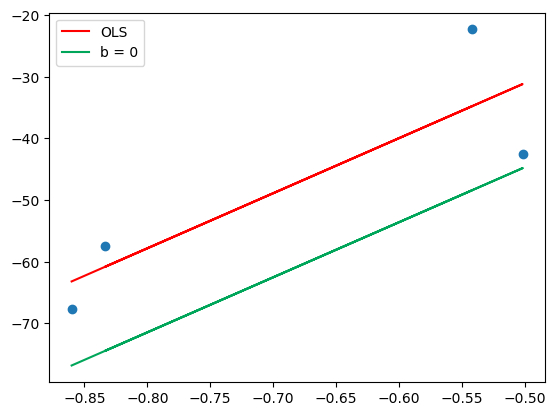

In [11]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='OLS')
plt.plot(X,y_pred, color='#00a65a', label='b = 0')
plt.legend()
plt.show()

In [12]:
m = 89.33
b = 0

loss_slop = -2 * np.sum(y - m*X.ravel() -b) #-2 * summetion of (y- mX - b)
loss_slop

-109.10831046716544

#### Lets assume learning rate =0.1

In [13]:
l_rate=0.1
step_size = loss_slop *l_rate
step_size

-10.910831046716545

#### Intercept

In [14]:
# bnew = bold - lr * slop

b=  b- step_size
b

10.910831046716545

In [15]:
m

89.33

#### Plot new best fit line for bnew = 10.91

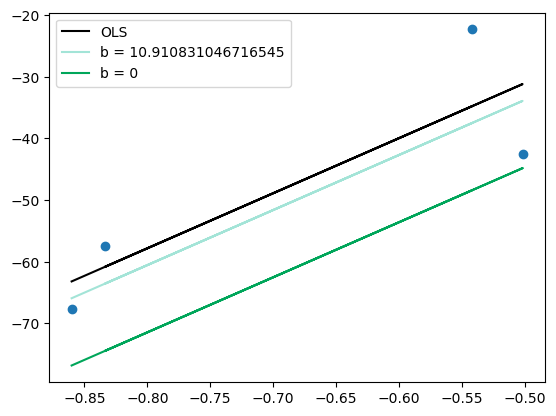

In [16]:
y_pred1 =((m *X + b)).reshape(4)
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='black',label='OLS')
plt.plot(X,y_pred1, color='#a3e4d7', label='b = {}'.format(b))
plt.plot(X,y_pred, color='#00a65a', label='b = 0')
plt.legend()
plt.show()

### Iteration 2

In [17]:
m , b

(89.33, 10.910831046716545)

In [18]:
loss_slop = -2 * np.sum(y - m*X.ravel() -b) #-2 * summetion of (y- mX - b)
loss_slop

-21.821662093433076

In [19]:
l_rate=0.1
step_size = loss_slop *l_rate
step_size

-2.1821662093433076

In [20]:
b=  b- step_size
b

13.092997256059853

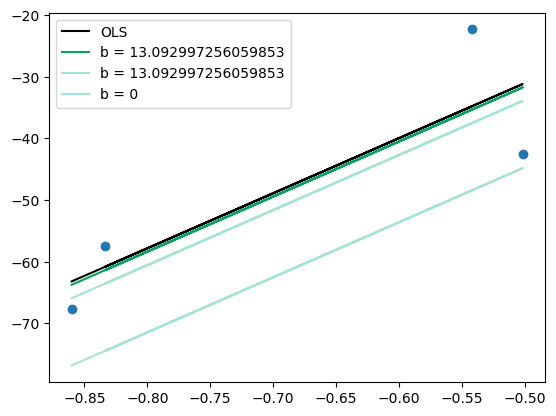

In [21]:
y_pred2 =((m *X + b)).reshape(4)
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='black',label='OLS')
plt.plot(X,y_pred2, color='#00a65a', label='b = {}'.format(b))
plt.plot(X,y_pred1, color='#a3e4d7', label='b = {}'.format(b))
plt.plot(X,y_pred, color='#a3e4d7', label='b = 0')
plt.legend()
plt.show()

### Iteration 3

In [22]:
m, b

(89.33, 13.092997256059853)

In [23]:
loss_slop = -2 * np.sum(y - m*X.ravel() -b) #-2 * summetion of (y- mX - b)
loss_slop

-4.364332418686615

In [24]:
l_rate=0.1
step_size = loss_slop *l_rate
step_size

-0.43643324186866156

In [25]:
b=  b- step_size
b

13.529430497928514

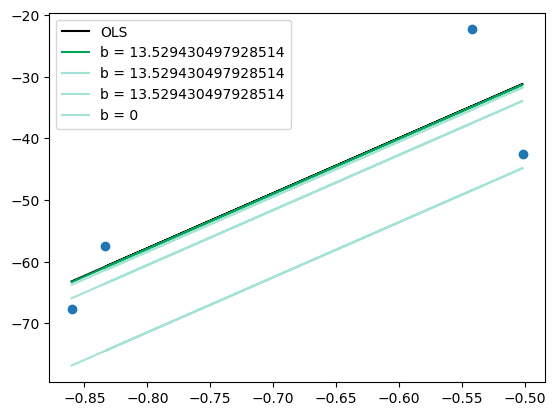

In [26]:
y_pred3 =((m *X + b)).reshape(4)
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='black',label='OLS')
plt.plot(X,y_pred3, color='#00a65a', label='b = {}'.format(b))
plt.plot(X,y_pred2, color='#a3e4d7', label='b = {}'.format(b))
plt.plot(X,y_pred1, color='#a3e4d7', label='b = {}'.format(b))
plt.plot(X,y_pred, color='#a3e4d7', label='b = 0')
plt.legend()
plt.show()

### Loop

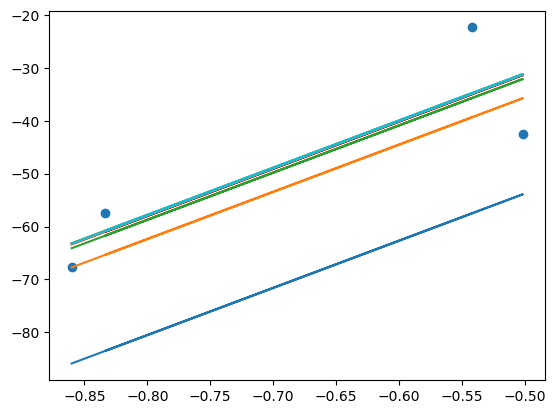

In [27]:
# Initialize value of b as we assume m is constant 
b = -100
m = 89.33

# Initialize learning rate and epochs
l_rate = 0.1
epochs = 10

# iteration over epochs value
for _ in range(epochs):
    # dL/db = -2 * sum (y- m * X - b)
    loss_slop = -2 * np.sum(y - m*X.ravel() -b)
    
    # bnew = bold - n*slop
    b= b - (loss_slop *l_rate) 
    
    #Prediction of best fit line
    y_pred = m * X + b
    
    plt.plot(X,y_pred)
    
plt.scatter(X,y)    
plt.show()